In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import plotly_express as px



In [2]:
laptop_data = pd.read_csv('Laptop_price.csv')
laptop_data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [3]:
# Creating a new index column called 'DeviceID' in the laptop_data DataFrame
laptop_data['DeviceID'] = range(1, len(laptop_data) + 1)

# Setting 'DeviceID' as the index of the DataFrame
laptop_data.set_index('DeviceID', inplace=True)

# Displaying the first few rows of the updated DataFrame to verify the new index
laptop_data.head()


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
DeviceID,,,,,,,
1,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
2,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
3,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
4,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
5,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [4]:
# Analyzing the data types, columns, and missing values
dtypes = laptop_data.dtypes
columns = laptop_data.columns
missing_values = laptop_data.isnull().sum()
missing_values_percentage = (laptop_data.isnull().mean() * 100)

# Descriptive statistics
descriptive_statistics = laptop_data.describe()

dtypes, columns, missing_values, missing_values_percentage, descriptive_statistics



(Brand                object
 Processor_Speed     float64
 RAM_Size              int64
 Storage_Capacity      int64
 Screen_Size         float64
 Weight              float64
 Price               float64
 dtype: object,
 Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
        'Screen_Size', 'Weight', 'Price'],
       dtype='object'),
 Brand               0
 Processor_Speed     0
 RAM_Size            0
 Storage_Capacity    0
 Screen_Size         0
 Weight              0
 Price               0
 dtype: int64,
 Brand               0.0
 Processor_Speed     0.0
 RAM_Size            0.0
 Storage_Capacity    0.0
 Screen_Size         0.0
 Weight              0.0
 Price               0.0
 dtype: float64,
        Processor_Speed     RAM_Size  Storage_Capacity  Screen_Size  \
 count      1000.000000  1000.000000       1000.000000  1000.000000   
 mean          2.750611    15.500000        584.576000    14.056790   
 std           0.731796    10.988665        313.438517     1.7058

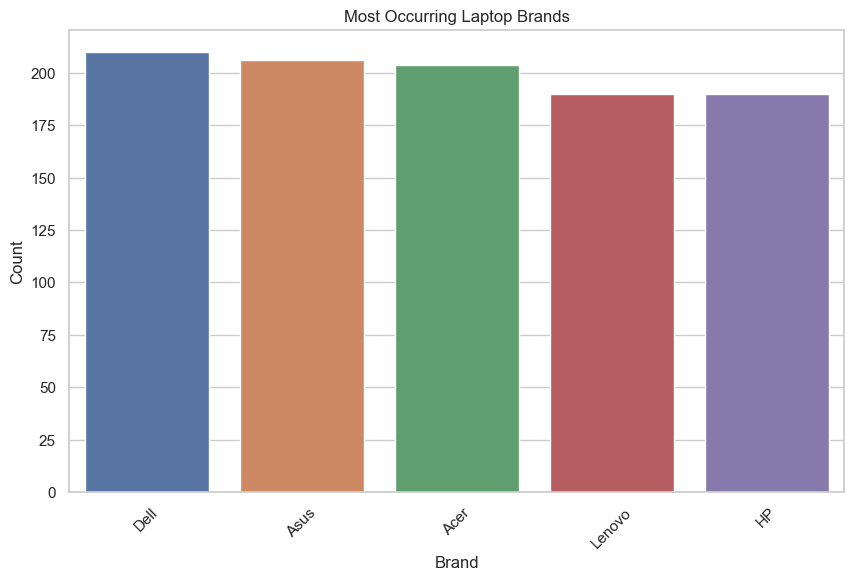

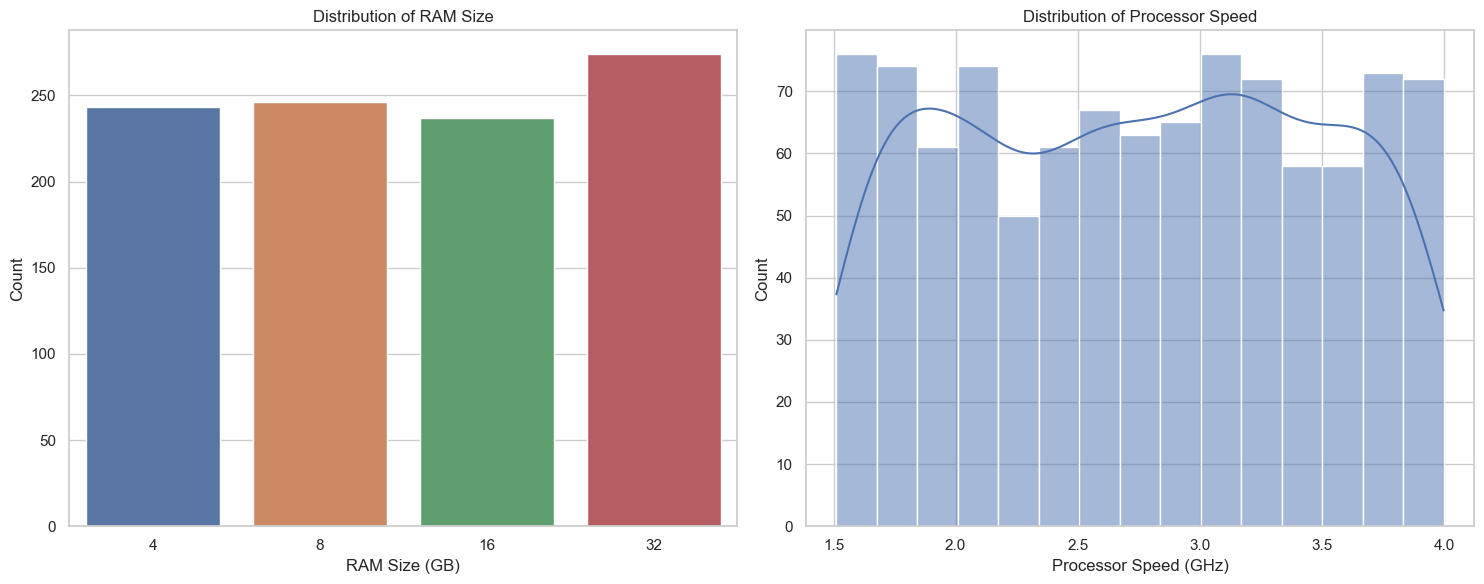

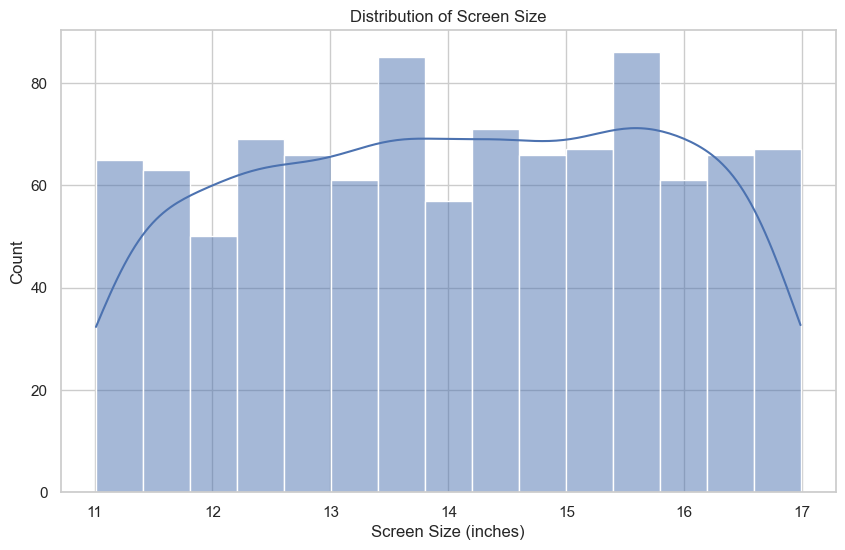

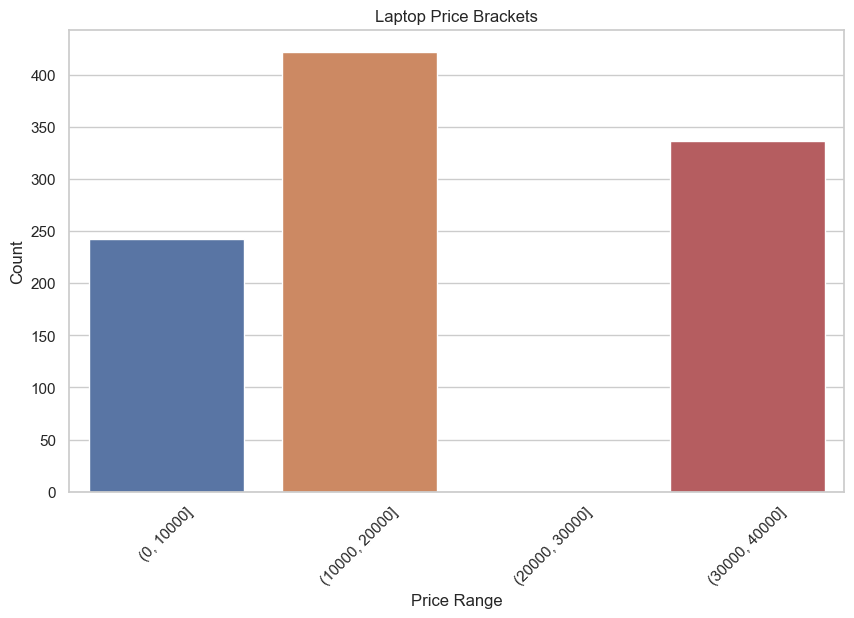

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# 1. Most Occurring Brands
plt.figure(figsize=(10, 6))
brand_count = laptop_data['Brand'].value_counts()
sns.barplot(x=brand_count.index, y=brand_count.values)
plt.title('Most Occurring Laptop Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('most_occurring_brands.png')
plt.show()

# 2. Most Occurring RAM and Processing Speed
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# RAM
sns.countplot(x='RAM_Size', data=laptop_data, ax=ax[0])
ax[0].set_title('Distribution of RAM Size')
ax[0].set_xlabel('RAM Size (GB)')
ax[0].set_ylabel('Count')

# Processor Speed
sns.histplot(laptop_data['Processor_Speed'], bins=15, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Processor Speed')
ax[1].set_xlabel('Processor Speed (GHz)')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('ram_and_processor_speed.png')
plt.show()

# 3. Most Common Screen Size
plt.figure(figsize=(10, 6))
sns.histplot(laptop_data['Screen_Size'], bins=15, kde=True)
plt.title('Distribution of Screen Size')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Count')
plt.savefig('screen_size_distribution.png')
plt.show()

# 4. Price Brackets
plt.figure(figsize=(10, 6))
price_brackets = pd.cut(laptop_data['Price'], bins=[0, 10000, 20000, 30000, 40000])
price_count = price_brackets.value_counts().sort_index()
sns.barplot(x=price_count.index.astype(str), y=price_count.values)
plt.title('Laptop Price Brackets')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('price_brackets.png')
plt.show()

In [6]:
columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')

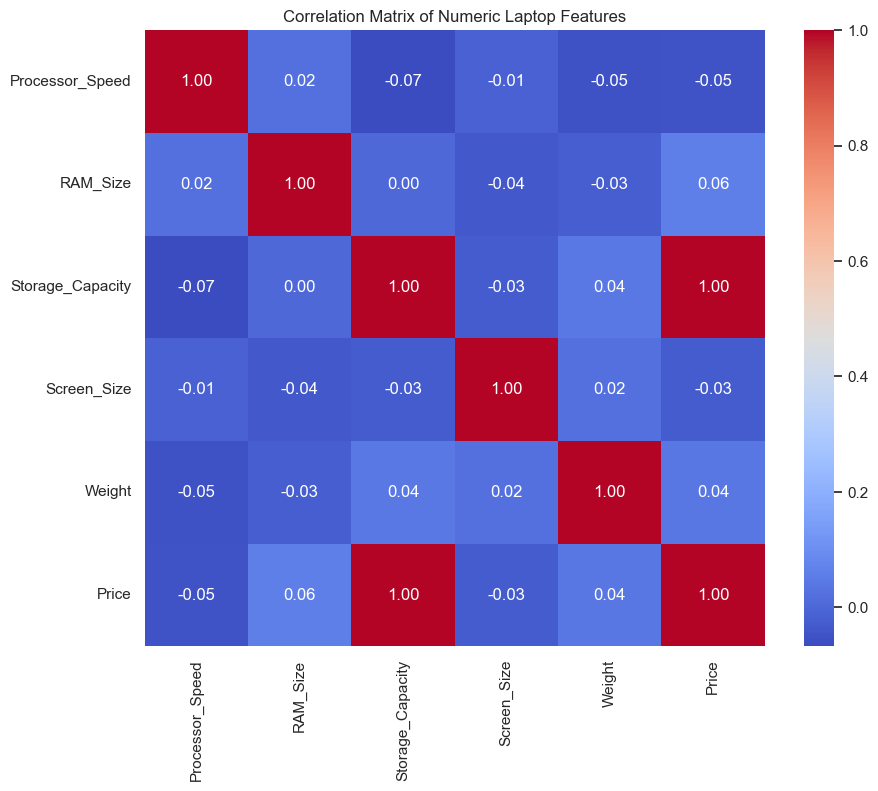

In [17]:
# Selecting only numerical columns for the correlation matrix
numerical_data = laptop_data.select_dtypes(include=[ 'float64', 'int64'])

# Calculating the correlation matrix for the numerical data
correlation_matrix_numerical = numerical_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numerical, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Laptop Features')
plt.savefig('correlation_matrix.png')
plt.show()


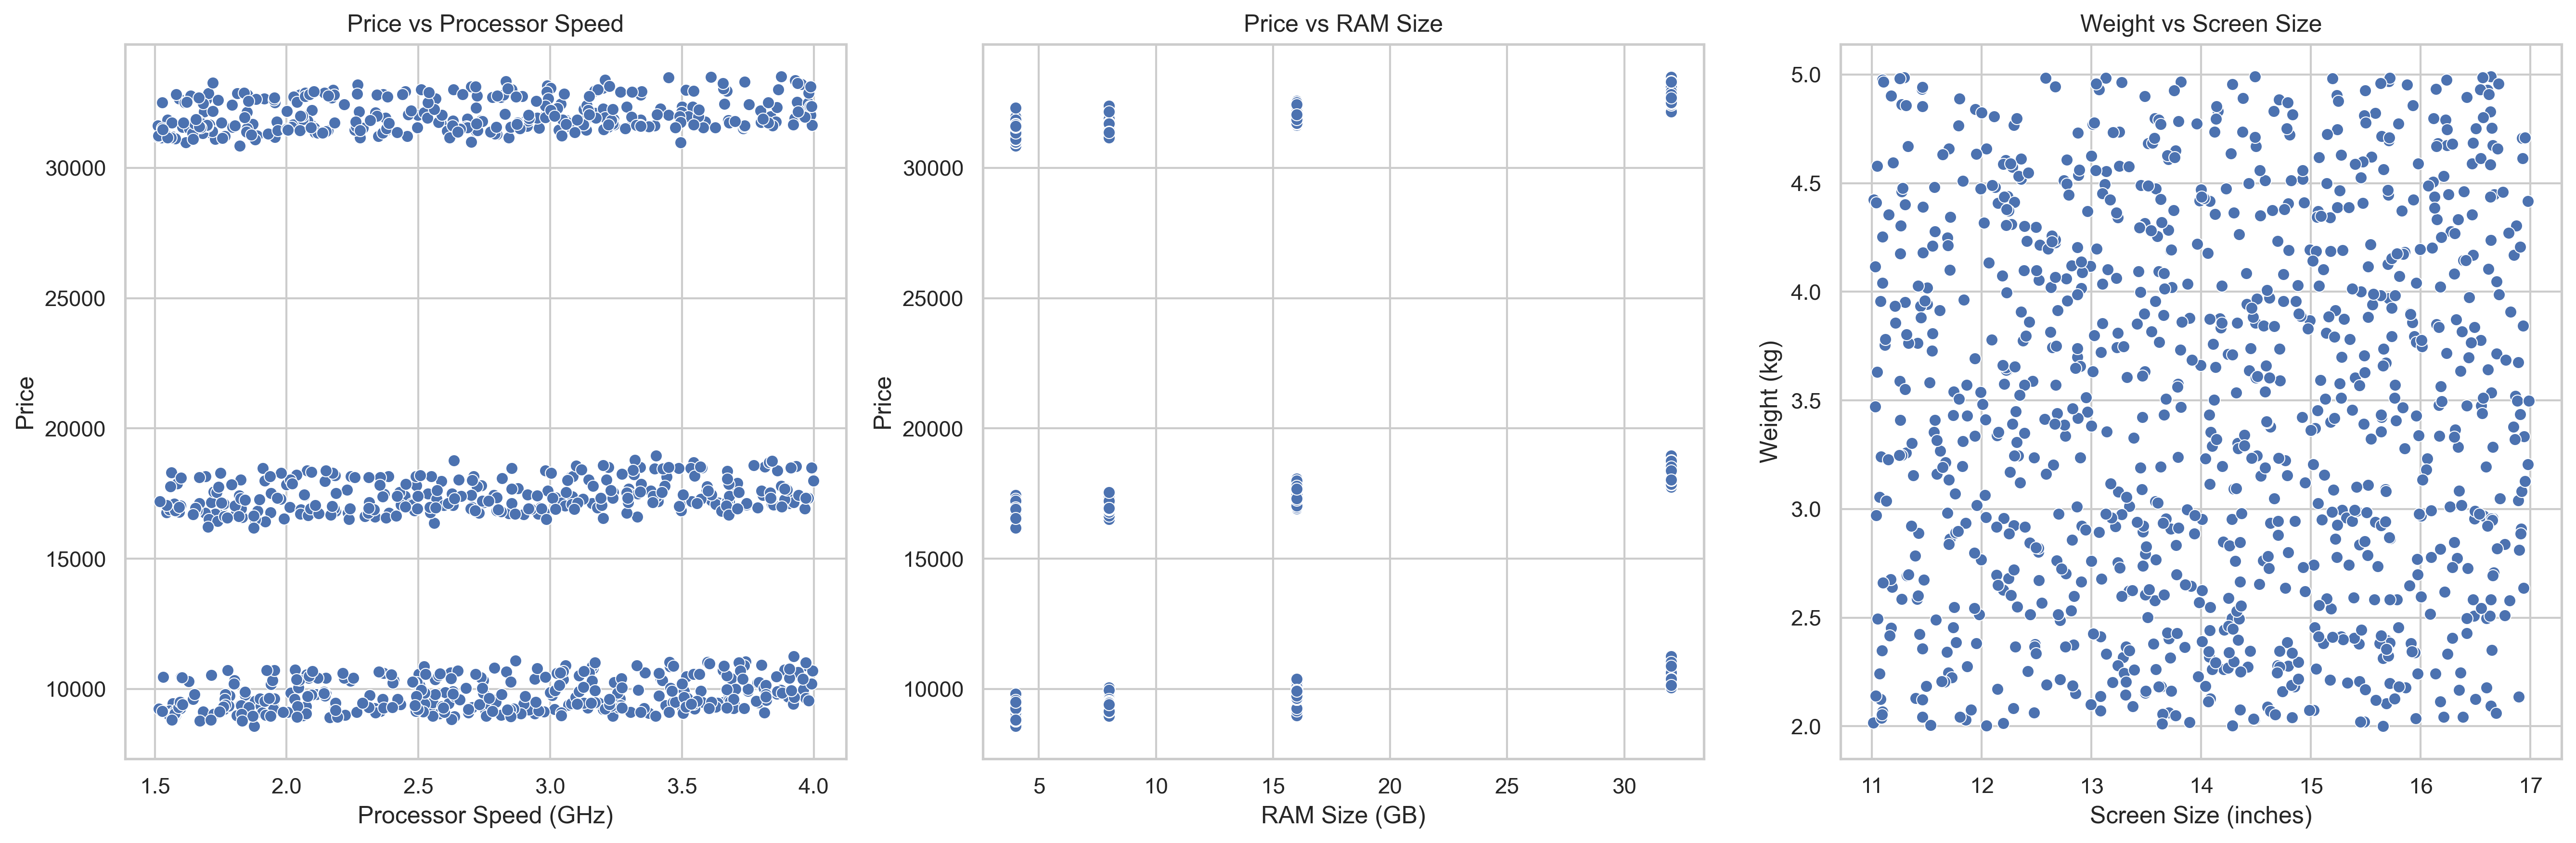

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi=300)

# Scatter plot for Price vs Processor Speed
sns.scatterplot(ax=axes[0], data=laptop_data, x='Processor_Speed', y='Price')
axes[0].set_title('Price vs Processor Speed')
axes[0].set_xlabel('Processor Speed (GHz)')
axes[0].set_ylabel('Price')

# Scatter plot for Price vs RAM Size
sns.scatterplot(ax=axes[1], data=laptop_data, x='RAM_Size', y='Price')
axes[1].set_title('Price vs RAM Size')
axes[1].set_xlabel('RAM Size (GB)')
axes[1].set_ylabel('Price')

# Scatter plot for Weight vs Screen Size
sns.scatterplot(ax=axes[2], data=laptop_data, x='Screen_Size', y='Weight')
axes[2].set_title('Weight vs Screen Size')
axes[2].set_xlabel('Screen Size (inches)')
axes[2].set_ylabel('Weight (kg)')

plt.tight_layout()
plt.savefig('scatter_plots.png')
plt.show()


In [9]:
from scipy.stats import pearsonr

# Pearson's correlation test for Screen Size and RAM Size
corr_screen_ram, p_value_screen_ram = pearsonr(laptop_data['Screen_Size'], laptop_data['RAM_Size'])

# Pearson's correlation test for Screen Size and Storage Capacity
corr_screen_storage, p_value_screen_storage = pearsonr(laptop_data['Screen_Size'], laptop_data['Storage_Capacity'])

corr_screen_ram, p_value_screen_ram, corr_screen_storage, p_value_screen_storage




(-0.036002173555466636,
 0.2553571075947216,
 -0.027559966015413828,
 0.3839736972988121)

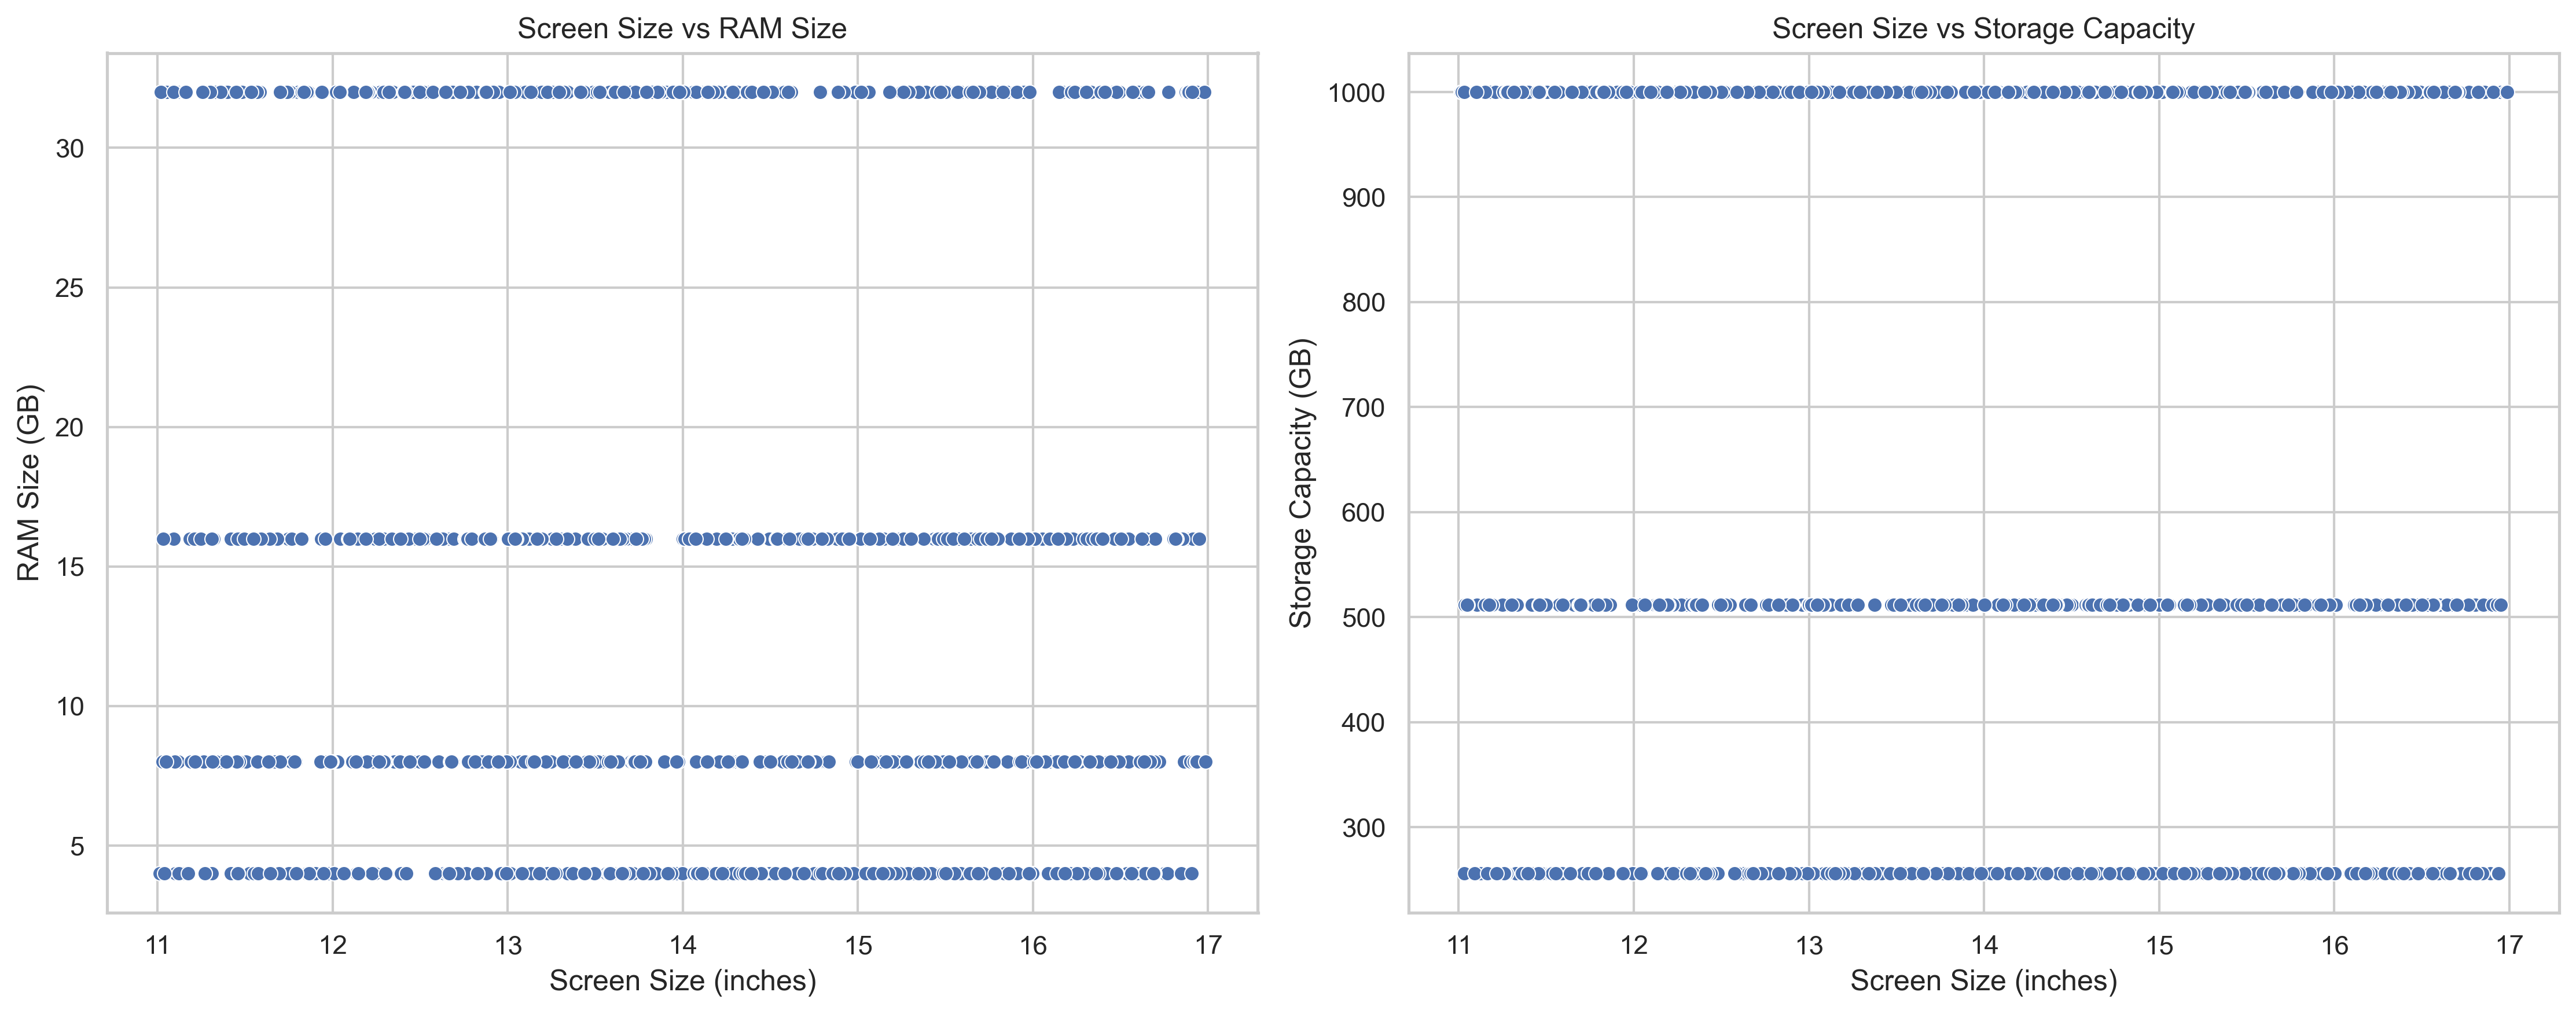

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6), dpi=300)

# Scatter plot for Screen Size vs RAM Size
sns.scatterplot(ax=ax[0], data=laptop_data, x='Screen_Size', y='RAM_Size')
ax[0].set_title('Screen Size vs RAM Size')
ax[0].set_xlabel('Screen Size (inches)')
ax[0].set_ylabel('RAM Size (GB)')

# Scatter plot for Screen Size vs Storage Capacity
sns.scatterplot(ax=ax[1], data=laptop_data, x='Screen_Size', y='Storage_Capacity')
ax[1].set_title('Screen Size vs Storage Capacity')
ax[1].set_xlabel('Screen Size (inches)')
ax[1].set_ylabel('Storage Capacity (GB)')

plt.tight_layout()
plt.savefig('screen_size_vs_ram_and_storage.png')
plt.show()

Correlation between Screen Size and RAM Size:

Correlation coefficient: -0.036

P-value: 0.255

Correlation between Screen Size and Storage Capacity:


Correlation coefficient: -0.028

P-value: 0.384

Interpretation:


For both tests, the correlation coefficients are very close to zero, indicating a very weak linear relationship between screen size and RAM size, and between screen size and storage capacity.
The p-values for both tests are greater than 0.05, which suggests that the correlations are not statistically significant.
Based on these results, we fail to reject the null hypothesis for both tests. This means there is no significant evidence to support the hypothesis that bigger screen-sized laptops have a higher need for RAM and storage. The data does not show a significant linear relationship between screen size and RAM size or storage capacity.

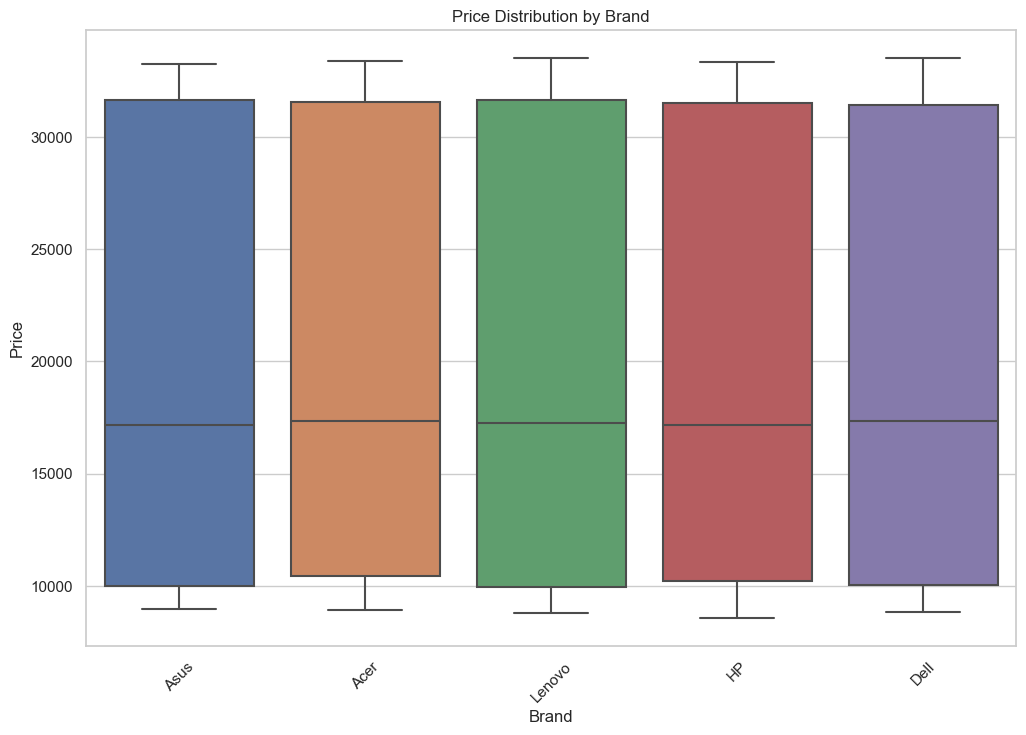

,sum_sq,df,F,PR(>F)
Brand,1.933911e+08,4.0,0.545468,0.702386
Residual,8.819219e+10,995.0,NaN,NaN


In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Boxplot to visualize the distribution of prices across different brands
plt.figure(figsize=(12, 8))
sns.boxplot(x='Brand', y='Price', data=laptop_data)
plt.xticks(rotation=45)
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.savefig('price_distribution_by_brand.png')
plt.show()

# Performing ANOVA test


# Ordinary Least Squares (OLS) model
model = ols('Price ~ Brand', data=laptop_data).fit()

# ANOVA test
anova_results = sm.stats.anova_lm(model, typ=2)

anova_results



The ANOVA test results are as follows:

F-value: 0.545468

P-value (PR(>F)): 0.702386

Interpretation:

The F-value in ANOVA tests indicates the ratio of variation between the group means to the variation within the groups. A higher F-value usually suggests a significant difference between group means.

The P-value is above the common threshold of 0.05, which indicates that the differences in mean prices among the various brands are not statistically significant.

Based on these results, we fail to reject the null hypothesis. This means there is no significant evidence to support the hypothesis that certain brands have higher or lower priced laptops more than others. The differences observed in the prices across different brands are not statistically significant.

In [12]:
# Pearson's correlation test for Processor Speed and RAM Size
corr_processor_ram, p_value_processor_ram = pearsonr(laptop_data['Processor_Speed'], laptop_data['RAM_Size'])

# Pearson's correlation test for Processor Speed and Storage Capacity
corr_processor_storage, p_value_processor_storage = pearsonr(laptop_data['Processor_Speed'], laptop_data['Storage_Capacity'])

corr_processor_ram, p_value_processor_ram, corr_processor_storage, p_value_processor_storage



(0.02139144024999116,
 0.4992387608521046,
 -0.06757648612863267,
 0.032620264766420846)

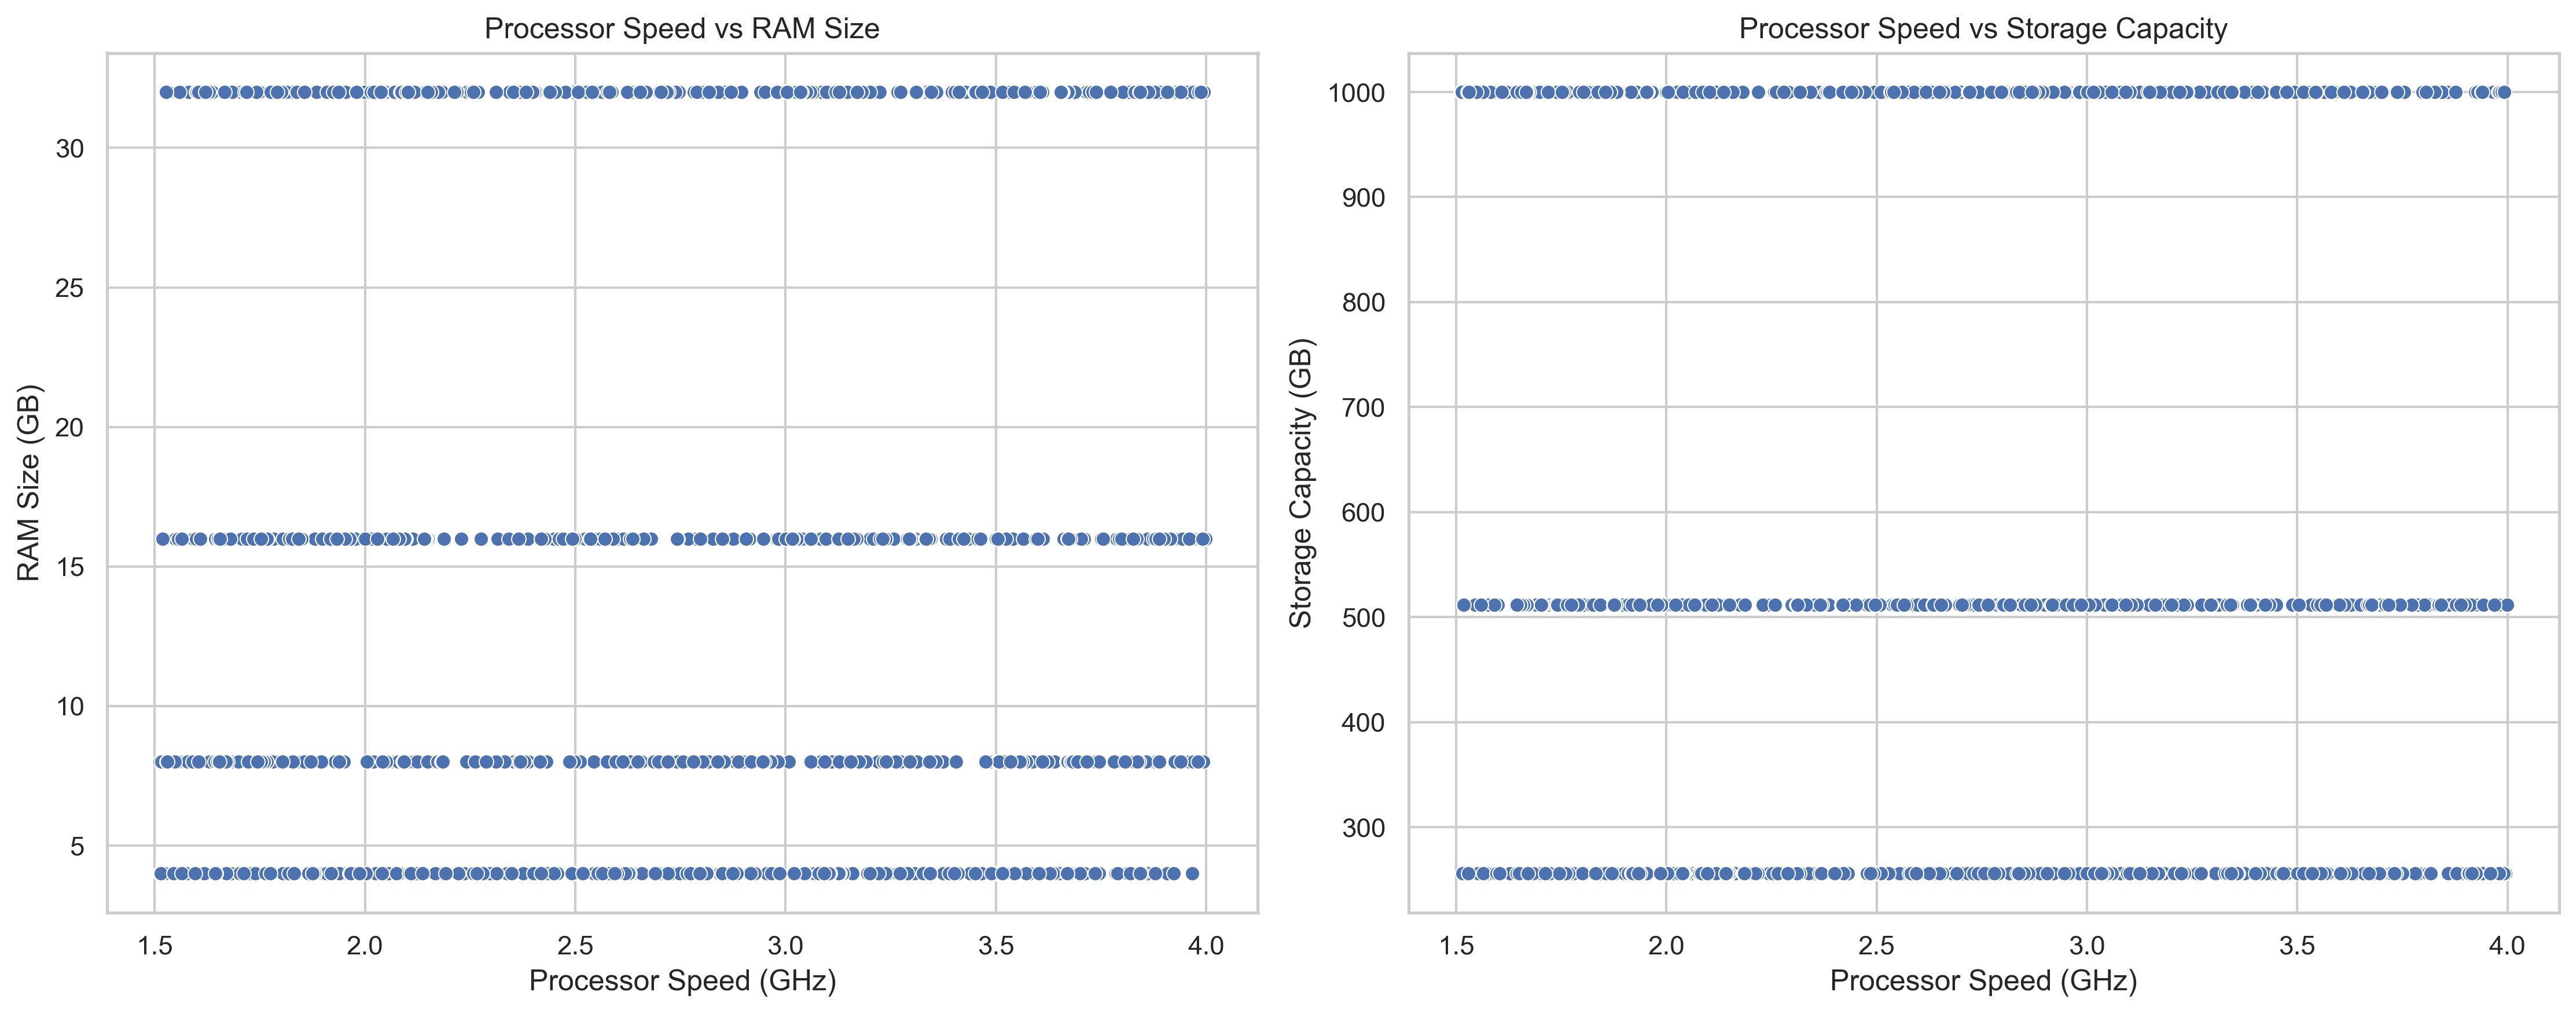

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6), dpi=300)

# Scatter plot for Processor Speed vs RAM Size
sns.scatterplot(ax=ax[0], data=laptop_data, x='Processor_Speed', y='RAM_Size')
ax[0].set_title('Processor Speed vs RAM Size')
ax[0].set_xlabel('Processor Speed (GHz)')
ax[0].set_ylabel('RAM Size (GB)')

# Scatter plot for Processor Speed vs Storage Capacity
sns.scatterplot(ax=ax[1], data=laptop_data, x='Processor_Speed', y='Storage_Capacity')
ax[1].set_title('Processor Speed vs Storage Capacity')
ax[1].set_xlabel('Processor Speed (GHz)')
ax[1].set_ylabel('Storage Capacity (GB)')

plt.tight_layout()
plt.savefig('processor_speed_vs_ram_and_storage.png')
plt.show()


Correlation between Processor Speed and RAM Size:

Correlation coefficient: 0.021

P-value: 0.499

Correlation between Processor Speed and Storage Capacity:


Correlation coefficient: -0.068

P-value: 0.033

Interpretation:


Processor Speed and RAM Size:

The correlation coefficient is close to zero (0.021), suggesting a very weak positive correlation.
The p-value is greater than 0.05, indicating that this correlation is not statistically significant.
Processor Speed and Storage Capacity:

The correlation coefficient is -0.068, indicating a weak negative correlation.
The p-value is slightly less than 0.05, which suggests that this correlation might be statistically significant, but it is still a weak correlation.
Based on these results:

We fail to reject the null hypothesis for the relationship between processor speed and RAM size, indicating no significant correlation.
For the relationship between processor speed and storage capacity, while there is a statistically significant result, the correlation is weak and negative, meaning that as processor speed increases, storage capacity slightly decreases, but the effect is not strong.
Therefore, the hypothesis that laptops with certain processor speeds tend to have similar RAM/storage is not strongly supported by the data, particularly for the RAM size. The relationship with storage capacity is statistically significant but weak and in the opposite direction than might be expected.

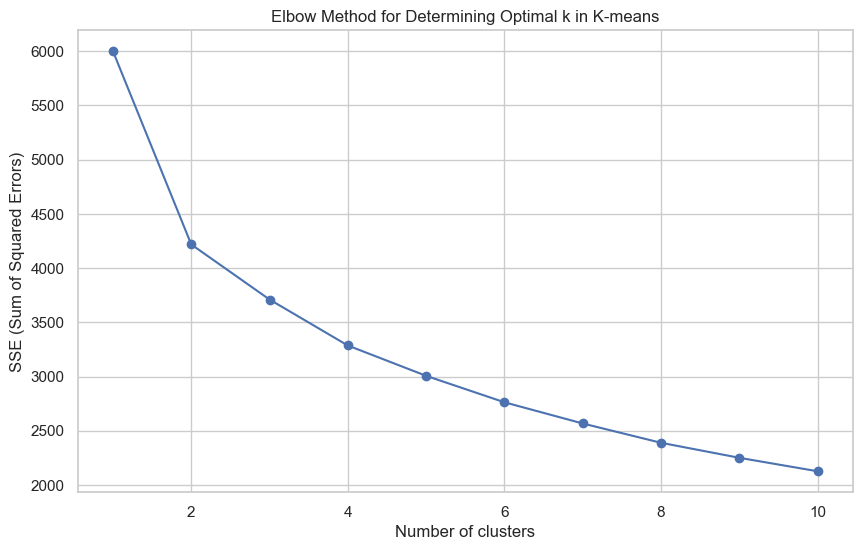

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Selecting only numerical features
numerical_features = laptop_data.select_dtypes(include=['float64', 'int64'])

# Standardizing the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Determining the optimal number of clusters using the elbow method
sse = []  # Sum of squared errors
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Determining Optimal k in K-means')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.savefig('elbow_plot.png')
plt.show()


The Elbow Method plot displays the Sum of Squared Errors (SSE) for different numbers of clusters (k) ranging from 1 to 10. We look for an "elbow" in this plot, where the rate of decrease in SSE sharply changes. This point is generally considered as an indicator of the optimal number of clusters.

In the plot, it's a bit challenging to discern a clear "elbow." However, it appears that the curve starts to flatten after 4 or 5 clusters. This suggests that 4 or 5 could be a reasonable choice for the number of clusters.

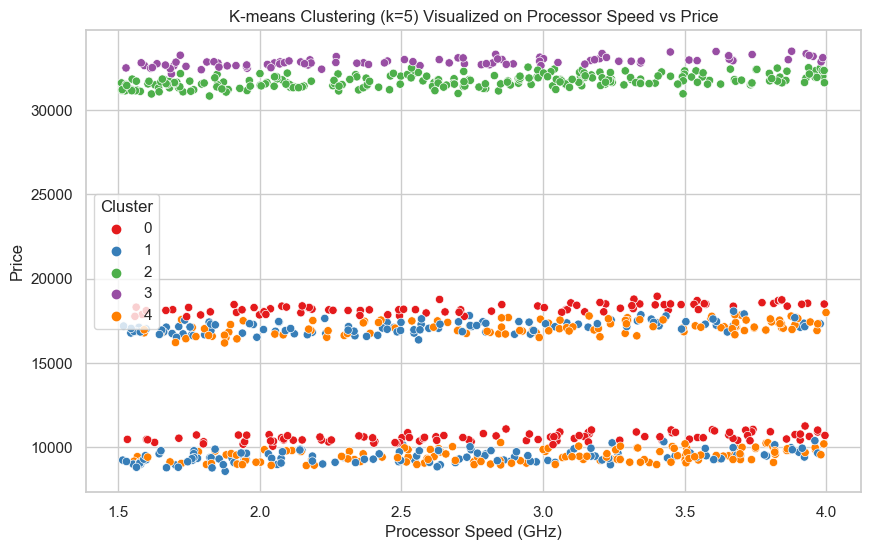

In [23]:
# Performing K-means clustering with the chosen number of clusters
k = 5  # Based on the elbow plot
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the original data for visualization
laptop_data['Cluster'] = clusters

# Visualizing the clusters - using 'Processor_Speed' and 'Price' as example features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Processor_Speed', y='Price', hue='Cluster', data=laptop_data, palette='Set1')
plt.title('K-means Clustering (k=5) Visualized on Processor Speed vs Price')
plt.xlabel('Processor Speed (GHz)')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.savefig('kmeans_clusters.png')
plt.show()


The scatter plot visualizes the results of the K-means clustering (with 
k=5 clusters) on the dimensions of Processor Speed and Price. Each point represents a laptop, colored according to the cluster it belongs to. This visualization helps in understanding how the laptops are grouped based on these two features.

From the plot, we can observe how the clusters are distributed with respect to processor speed and price. Different clusters may represent groups of laptops with varying characteristics, such as budget, mid-range, and high-end devices, depending on their processor speeds and prices.